# Кластеризация и техники понижения размерности. 

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import rand_score

import pandas as pd
import numpy as np

# 2. Оценка качества кластеризации: внутренние меры

### КОЭФФИЦИЕНТ СИЛУЭТА

In [ ]:
# При решении практических задач вы будете использовать уже готовые алгоритмы на Python. 
# Для вычисления коэффициента силуэта в библиотеке sklearn используется silhouette_score:

#определяем алгоритм кластеризации
km = KMeans(n_clusters=3, random_state=42)
#обучаем его на наших данных
km.fit_predict(X)
#вычисляем значение коэффициента силуэта
score = silhouette_score(X, km.labels_, metric='euclidean')

### ИНДЕКС КАЛИНСКИ — ХАРАБАСА

In [ ]:
#В библиотеке sklearn данный алгоритм реализуется с помощью метода calinski_harabasz_score():

#определяем алгоритм кластеризации
km = KMeans(n_clusters=3, random_state=42)
#обучаем его на наших данных
km.fit_predict(X)
#вычисляем значение коэффициента Калински — Харабаса
score = calinski_harabasz_score(X, km.labels_)

### ИНДЕКС ДЭВИСА — БОЛДИНА

In [ ]:
# В библиотеке sklearn индекс Дэвиса — Болдина реализуется с помощью метода davies_bouldin_score():

#определяем алгоритм кластеризации
km = KMeans(n_clusters=3, random_state=42)
#обучаем его на наших данных
km.fit_predict(X)
#вычисляем значение коэффициента Дэвиса — Болдина
score = davies_bouldin_score(X, km.labels_)

# 3. Оценка качества кластеризации: внешние меры

### ИНДЕКС РЭНДА

In [5]:
# Для вычисления индекса Рэнда с помощью библиотеки sklearn можно использовать метод rand_score():

print(rand_score([1, 1, 1, 2, 2], [1, 1, 2, 2, 3]))

0.6


Исправленный индекс Рэнда в sklearn представлен через метод adjusted_rand_score().

### НОРМАЛИЗОВАННАЯ ВЗАИМНАЯ ИНФОРМАЦИЯ

В sklearn для вычисления NMI существует метод normalized_mutual_info_score().  
  
  С точки зрения оценки качества разбиения коэффициент должен быть как можно ближе к единице: нулевое значение указывает на случайное разбиение, а 1 — на максимальную согласованность. В нашем случае значение получилось ближе к 0, но, учитывая предложенное разбиение (далёкое от необходимого), это ожидаемый результат.

### ОДНОРОДНОСТЬ

Однородность также можно вычислить, воспользовавшись методом homogeneity_score() из библиотеки sklearn

### ПОЛНОТА

Для вычисления полноты с помощью библиотеки sklearn используется метод completeness_score()

### V-МЕРА

Для вычисления V-меры с помощью библиотеки sklearn используется метод v_measure_score().

# 4. Меры качества кластеризации. Практика

In [22]:
# 4.1
# Так как изначально данные были представлены для решения задачи классификации, 
# то они находятся в разных файлах (обучающая и тестовая выборки в соотношении 70/30). 
# Соедините признаки так, чтобы сначала шла обучающая выборка, а затем — тестовая, 
# и отдельно соедините значения целевых переменных (разумеется, в том же порядке).

# Какая размерность получилась у набора данных с признаками?

X_train = np.loadtxt("data/train.txt")
y_train = np.loadtxt("data/train_labels.txt")
 
X_test = np.loadtxt("data/test.txt")
y_test = np.loadtxt("data/test_labels.txt")
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
X.shape

(10299, 561)

In [26]:
# 4.2
# Теперь найдите число различных активностей, то есть на сколько кластеров в идеале должны разделиться наблюдения.
len(set(y))
## len(np.unique(y))

6

In [30]:
# 4.3
# Далее необходимо отмасштабировать признаки. Будем использовать для этого алгоритм StandardScaler. 
# Примените его ко всем значениям признаков и впишите в качестве ответа значение первого признака для первого объекта, 
# предварительно округлив его до двух знаков после точки-разделителя.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_norm[0][0]

0.2105338541767611

In [31]:
# 4.4
# Пора переходить к кластеризации. 
# Для начала определите оптимальное количество кластеров, используя внутренние меры кластеризации. 
# Используйте все известные вам коэффициенты, реализуемые в библиотеке sklearn: 
# коэффициент силуэта, индекс Калински — Харабаса и индекс Дэвиса — Болдина. 
# В качестве алгоритма возьмите k-means++, в качестве значения параметра random_state — число 42.

# Выведите оптимальное количество кластеров для каждой метрики, перебирая значения от 2 до 9 включительно. 
# Также введите значение каждой метрики, округлённое до двух знаков после точки-разделителя.

sil = []
kal = []
dav = []

for i in range(2,10):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X_norm)
    sil.append(silhouette_score(X_norm, km.labels_,metric='euclidean'))
    kal.append(calinski_harabasz_score(X_norm, km.labels_))
    dav.append(davies_bouldin_score(X_norm, km.labels_))
    

In [47]:
# 4.5
# Теперь давайте оценим качество кластеризации с точки зрения внешних мер. 
# Реализуйте кластеризацию с помощью классической версии алгоритма k-means. 
# Пусть количество кластеров будет соответствовать количеству активностей. 
# Параметр random_state = 42. В качестве ответов введите значения получившихся мер, 
# предварительно округлив их до двух знаков после точки-разделителя.
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import adjusted_rand_score

km = KMeans(n_clusters=6, random_state=42, init="random")
km.fit(X_norm)
print(homogeneity_score(y, km.labels_))
print(completeness_score(y, km.labels_))
print(adjusted_rand_score(y, km.labels_))

0.5404114294595578
0.5809491951515007
0.4196031125923396


In [48]:
# 4.6
# Выясните, к каким кластерам были преимущественно отнесены различные активности 
# (т. е. в какой кластер попало большинство наблюдений с этой активностью). Нумерацию кластеров начинайте с 1.

# Заметьте, что кластеры могут повторяться.

#создаём таблицу сопряжённости
ct = pd.crosstab(y, km.labels_)
#определяем название активностей
ct.index = ['ходьба', 'подъём', 
             'спуск', 'сидение', 'стояние', 'лежание']
ct.columns = list(range(1,7))
ct

,1,2,3,4,5,6
ходьба,0,0,903,78,741,0
подъём,0,0,1242,5,295,2
спуск,0,0,321,196,889,0
сидение,91,1238,1,0,0,447
стояние,0,1346,0,0,0,560
лежание,1556,54,5,0,0,329


In [49]:
# 4.7
# Теперь попробуйте реализовать алгоритм k-means для двух кластеров (для того числа активностей, 
# которое является оптимальным с точки зрения внутренних мер) и снова посмотреть, как алгоритм разобьёт активности по кластерам. 
# Как и в предыдущем задании, нумерацию кластеров начинайте с 1.

km = KMeans(n_clusters=2, random_state=42, init="random")
km.fit(X_norm)
#создаём таблицу сопряжённости
ct = pd.crosstab(y, km.labels_)
#определяем название активностей
ct.index = ['ходьба', 'подъём', 
             'спуск', 'сидение', 'стояние', 'лежание']
ct.columns = list(range(1,3))
ct

,1,2
ходьба,1722,0
подъём,1536,8
спуск,1406,0
сидение,3,1774
стояние,0,1906
лежание,12,1932


In [50]:
# 4.8
# Вычислите значение полноты для разбиения на два кластера алгоритмом k-means. 
# Ответ округлите до двух знаков после точки-разделителя.
print(completeness_score(y, km.labels_))

0.979530559699631


In [51]:
# 4.10
# Давайте сравним полученный результат с агломеративной иерархической кластеризацией. 
# Реализуйте её также для двух кластеров и вычислите значение полноты.
from sklearn.cluster import AgglomerativeClustering

agl = AgglomerativeClustering(n_clusters=2)
agl.fit(X_norm)
# 1. Какой алгоритм показывает наилучшее качество, если судить по полноте?

# 2. Какое значение полноты получилось для агломеративной кластеризации?
print(completeness_score(y, agl.labels_))

0.9999999999999993


# 5. PCA

*АЛГОРИТМ РЕАЛИЗАЦИИ PCA*
  
* 1  Стандартизировать данные.  
  
* 2 Рассчитать ковариационную матрицу для объектов.  
  
* 3 Рассчитать собственные значения и собственные векторы для ковариационной матрицы.  
  
* 4 Отсортировать собственные значения и соответствующие им собственные векторы.  
  
* 5 Выбрать  наибольших собственных значений и сформировать матрицу соответствующих собственных векторов.  
  
* 6 Преобразовать исходные данные, умножив матрицу данных на матрицу отобранных собственных векторов.

In [52]:
# 1. стандартизация
import numpy as np
import pandas as pd
A = np.matrix([[1,2,3,4],
               [5,5,6,7],
               [1,4,2,3],
               [5,3,2,1],
               [8,1,2,2]])

df = pd.DataFrame(A,columns  = ['x1','x2','x3','x4'])
df_std  = (df - df.mean()) / (df.std())

In [53]:
# 2. ковариационная матрица
cov_mat = np.cov(df_std.T)
cov_mat

array([[ 1.        , -0.31622777,  0.04811252, -0.18098843],
       [-0.31622777,  1.        ,  0.63900965,  0.61812254],
       [ 0.04811252,  0.63900965,  1.        ,  0.94044349],
       [-0.18098843,  0.61812254,  0.94044349,  1.        ]])

In [68]:
# 3-4-5. собственные значения и векторы
eigen_val, eigen_vectors = np.linalg.eig(cov_mat)
# хотим уменьшить признаки до 2, поэтому берём 2 вектора
eigen = np.array([eigen_vectors.T[0], eigen_vectors.T[1]])
eigen.T

array([[ 0.16195986, -0.91705888],
       [-0.52404813,  0.20692161],
       [-0.58589647, -0.3205394 ],
       [-0.59654663, -0.11593512]])

In [69]:
# 6. умножаем данные на матрицу собственных веторов
df_std@eigen.T

,0,1
0,0.014003,0.755975
1,-2.556534,-0.780432
2,-0.051480,1.253135
3,1.014150,0.000239
4,1.579861,-1.228917


Таким образом, мы получили две главных компоненты. Можно проверить, получили ли бы мы тот же результат, если бы воспользовались сразу готовым алгоритмом на Python — PCA.  
  
В параметр n_components в качестве значения можно передать количество необходимых компонентов или минимально допустимую объяснённую дисперсию в виде десятичной дроби. Например, если нам нужно столько компонент, чтобы они объясняли не менее 90 % разброса данных, то мы запишем n_components = 0.9.


In [71]:
#импортируем нужный алгоритм

from sklearn.decomposition import PCA
#определяем метод главных компонент с двумя компонентами
pca = PCA(n_components=2)
#обучаем алгоритм на наших данных
principalComponents = pca.fit_transform(df_std)
principalComponents

array([[-1.40033078e-02,  7.55974765e-01],
       [ 2.55653399e+00, -7.80431775e-01],
       [ 5.14801919e-02,  1.25313470e+00],
       [-1.01415002e+00,  2.38808310e-04],
       [-1.57986086e+00, -1.22891650e+00]])

In [77]:
# 5.1
# Найдите матрицу ковариаций для векторов  и . 
# В качестве ответа укажите сумму всех значений матрицы, округлённую до двух знаков после точки-разделителя.
a = np.array([[3,4,1], [1,6,2]])

cov_mat = np.cov(a)
cov_mat.sum()

14.333333333333334

In [80]:
# 5.5
# Дана матрица признаков:

A = np.matrix([[8,7,2,9],
               [1,3,6,3],
               [7,2,0,3],
               [10,3,1,1],
               [8,1,3,4]])
# Какое минимальное количество главных компонент надо выделить, чтобы сохранить информацию о как минимум 90 % разброса данных?
 
df = pd.DataFrame(A)
df_std  = (df - df.mean()) / (df.std())
pca = PCA(n_components=0.9)
principalComponents = pca.fit_transform(df_std)
principalComponents

array([[-1.61145254,  1.76368007,  0.01320928],
       [ 2.08441051,  1.01724955, -0.24417084],
       [-0.29568142, -0.95946326, -0.05272576],
       [-0.50390826, -1.24373821, -0.50808763],
       [ 0.3266317 , -0.57772816,  0.79177495]])

# 6. Снижение размерности: SVD и t-SNE

In [81]:
# 6.1
# Вычислите получившееся произведение матриц  и :

A = np.array([[-1,1,0],[-1,-1,1]])
A@A.T

array([[2, 0],
       [0, 3]])

Для того чтобы реализовать сингулярное разложение с помощью библиотеки sklearn, необходимо использовать алгоритм TruncatedSVD(), в который передаётся n_components в качестве параметра, определяющего количество итоговых компонент:

In [ ]:
from sklearn.decomposition import TruncatedSVD

# создаём объект класса TruncatedSVD
# n_components — размерность нового пространства, n_iter — количество итераций
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
# обучаем модель на данных X
svd.fit(X)
# применяем уменьшение размерности к матрице X
transformed = svd.transform(data)

In [ ]:
# Для реализации t-SNE в sklearn понадобится алгоритм TSNE():

# импортируем класс TSNE из модуля manifold библиотеки sklearn
from sklearn.manifold import TSNE
# создаём объект класса TSNE
# n_components — размерность нового пространства
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
# обучаем модель на данных X и применяем к матрице X уменьшение размерности
tsne.fit_transform(X)

# 7. Снижение размерности. Практика

In [84]:
# 7.1
# Каково максимальное значение показателя средней продолжительности жизни среди представленных стран? 
# Ответ округлите до одного знака после точки-разделителя.

data = pd.read_csv("data/Country-data.csv")
data['life_expec'].max()

82.8

In [86]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [87]:
# 7.2
# Чтобы получить более качественные результаты, необходимо стандартизировать данные. 
# Используйте для этого StandardScaler. 
# Примените его ко всем значениям признаков и впишите в качестве ответа значение первого признака для первого объекта 
# (таким образом можно будет проверить, что вы всё сделали корректно). 
# Ответ округлите до двух знаков после точки-разделителя.

scaler = StandardScaler()
X_norm = scaler.fit_transform(data.drop(['country'], axis=1))
X_norm[0][0]

1.2915323778422956

In [92]:
# 7.3
# Как вы помните, нет смысла использовать сильно связанные друг с другом признаки, 
# так как их можно преобразовать в один и таким образом уменьшить общее количество признаков. 
# Давайте выясним, есть ли в данных такие признаки.

# Постройте матрицу корреляций для всех признаков. Найдите максимальный коэффициент корреляции. 
# Запишите его в качестве ответа, предварительно округлив до двух знаков после точки-разделителя.

data.corr()

/var/folders/tp/mcxy8wd524b65_m2_4n493dh0000gn/T/ipykernel_46893/4005348125.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [93]:
# 7.4
# Теперь понизим размерность данных — возьмём для этого метод главных компонент (PCA) как самый простой и популярный.

# Найдите минимальное число компонент, которые суммарно могут объяснить как минимум 90 % разброса данных.

pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_norm)
X_pca

array([[-2.91302459e+00,  9.56205755e-02, -7.18118495e-01,
         1.00525464e+00, -1.58310044e-01],
       [ 4.29911330e-01, -5.88155666e-01, -3.33485505e-01,
        -1.16105859e+00,  1.74677321e-01],
       [-2.85225077e-01, -4.55174413e-01,  1.22150481e+00,
        -8.68114503e-01,  1.56474647e-01],
       [-2.93242265e+00,  1.69555507e+00,  1.52504374e+00,
         8.39625014e-01, -2.73208934e-01],
       [ 1.03357587e+00,  1.36658709e-01, -2.25720917e-01,
        -8.47062687e-01, -1.93006961e-01],
       [ 2.24072616e-02, -1.77918658e+00,  8.69997116e-01,
        -3.69668667e-02,  9.81056507e-01],
       [-1.01583737e-01, -5.68251724e-01,  2.42091816e-01,
        -1.46626576e+00, -5.59924282e-02],
       [ 2.34216461e+00, -1.98845915e+00,  1.90344188e-01,
         1.10503778e+00, -7.31192330e-01],
       [ 2.97376366e+00, -7.34688659e-01, -5.19766356e-01,
         1.20544210e+00,  8.35797058e-02],
       [-1.81486997e-01, -4.02865873e-01,  8.67458743e-01,
        -4.38772983e-01

In [94]:
# 7.5
# Какую долю дисперсии объясняет первая главная компонента среди главных компонент, полученных в предыдущем задании? 
# Ответ округлите до двух знаков после точки-разделителя.

pca.explained_variance_ratio_[0]

0.4595173978609587

<AxesSubplot:>

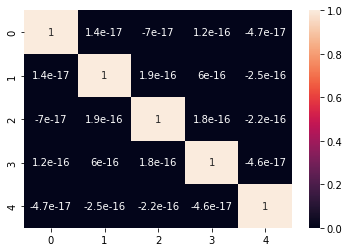

In [100]:
# 7.6
# Как вы помните, при создании компонент с помощью PCA они должны получиться независимыми, 
# то есть мы не должны теперь наблюдать высоких коэффициентов корреляции.

# Постройте матрицу корреляций. Сколько значений в ней превышают 0.001, не считая единичных значений на главной диагонали?
dd = pd.DataFrame(X_pca)

import seaborn as sns

sns.heatmap(dd.corr(), annot=True)

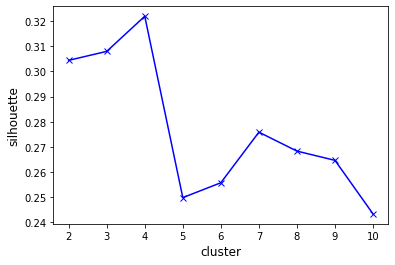

In [104]:
# 7.7
# Теперь, когда мы уменьшили размерность данных, можно переходить к кластеризации. 
# Подберите оптимальное количество кластеров с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно. 
# Для кластеризации используйте алгоритм k-means++. В качестве значения параметра random_state возьмите число 1.

# Судя по полученным результатам, сколько кластеров лучше всего взять?

# Метод силуэта
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# напишем функцию, как и при подсчёте метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=1)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

silhouette = []
for clust_num in range(2, 11):
    silhouette.append(get_silhouette(clust_num, X_pca))

# визуализируем коэффициенты силуэта для разного количества кластеров
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 11)], silhouette, 'xb-')

In [105]:
# 7.8
# Теперь, когда оптимальное количество кластеров выбрано, реализуйте алгоритм k-means++ с этим параметром. 
# В качестве значения random_state возьмите число 1.

# В какой кластер попали страны, у которых самый высокий показатель детской смертности и самый низкий ВВП на душу населения?

km = KMeans(n_clusters=4, random_state=1)
km.fit(X_pca)
y_pred = km.labels_
data['kmeans_4'] = y_pred
data.groupby(['kmeans_4'])[['child_mort','gdpp']].agg(['max','min'])

child_mort          gdpp       
                max   min     max    min
kmeans_4                                
0              64.4   4.5   20700    592
1             208.0  36.9   17100    231
2               6.8   2.8  105000  21100
3              13.8   2.6   87800  19800

In [107]:
# 7.9
# Итак, мы понимаем, что именно в выбранном нами кластере находятся страны, которые особенно остро нуждаются в финансовой помощи. 
# Однако на все страны у нас не хватит ресурсов, поэтому давайте выберем из выделенного кластера три страны, 
# в которых самая маленькая продолжительность жизни.
mask = data['kmeans_4']==1
data[mask][['country','life_expec']].sort_values('life_expec')

,country,life_expec
66,Haiti,32.1
87,Lesotho,46.5
31,Central African Republic,47.5
166,Zambia,52.0
94,Malawi,53.1
137,South Africa,54.3
106,Mozambique,54.5
132,Sierra Leone,55.0
64,Guinea-Bissau,55.6
0,Afghanistan,56.2
